## Checking RPP filters with simple waveforms and calculation of cprime for ST filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
v_check=np.concatenate([np.full(200,0),np.full(200,1)])
#v_check

In [3]:
R0_0_L=[0]*400
R0_1_L=[0]*400

R1_0_L=[0]*400
R1_1_L=[0]*400

R2_0_L=[0]*400
R2_1_L=[0]*400

R3_0_L=[0]*400
R3_1_L=[0]*400

L0=100
for i in range (1,400):
    if (i>L0):
        #1st term
        R0_0_L[i] = v_check[i] - v_check[i-L0] #r0
        R0_1_L[i]=R0_1_L[i-1]+R0_0_L[i]
        
        #2nd term
        R1_0_L[i]=R0_1_L[i]-L0*v_check[i-L0] #r1
        R1_1_L[i]=R1_1_L[i-1]+R1_0_L[i]
        
        #3rd term
        R2_0_L[i]=R1_1_L[i]-0.5*L0*(L0+1)*v_check[i-L0]#r2
        R2_1_L[i]=R2_1_L[i-1]+R2_0_L[i]
        
        #4th term
        R3_0_L[i]=R2_1_L[i]-1/6*L0*(L0+1)*(L0+2)*v_check[i-L0] #r3
        R3_1_L[i]=R3_1_L[i-1]+R3_0_L[i]
        

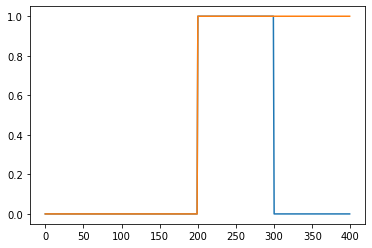

In [4]:
plt.plot(R0_0_L)
plt.plot(v_check)

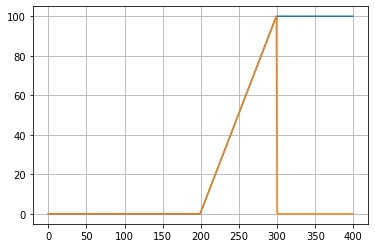

In [5]:
plt.plot(R0_1_L)
plt.plot(R1_0_L)
plt.grid()

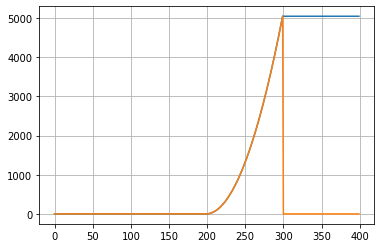

In [6]:
plt.plot(R1_1_L)
plt.plot(R2_0_L)
plt.grid()

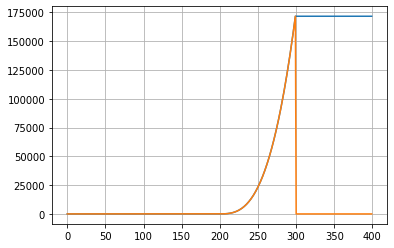

In [7]:
plt.plot(R2_1_L)
plt.plot(R3_0_L)
plt.grid()

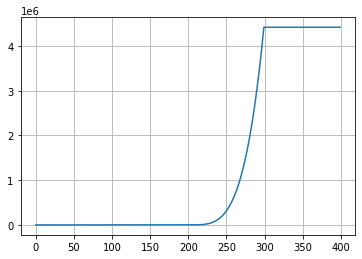

In [8]:
plt.plot(R3_1_L)
plt.grid()

### Obtaining cprimes values for the single trapezoidal filter for the exponential function

In [9]:
#f1=[0]*700#(2*rise time+ flat top)
def ST_Filter(risetime, flat_top, tau):
    f1=np.zeros(2*risetime+flat_top)
    for i in range(risetime):
        f1[i]=i+tau
        f1[i+risetime+flat_top]=-i-tau+risetime
    for i in range(risetime,risetime+flat_top):
        f1[i]=risetime
    scale=1.0/(risetime*tau)
    f1*=scale
    return f1

In [10]:
single_trap=ST_Filter(300, 100, 1500)
single_trap_rise=single_trap[:300]
t_rise=np.arange(0,300)
single_trap_flat=single_trap[300:400]
t_flat=np.arange(0,100)
single_trap_dec=single_trap[400:700]
t_dec=np.arange(0,300)
#single_trap_dec

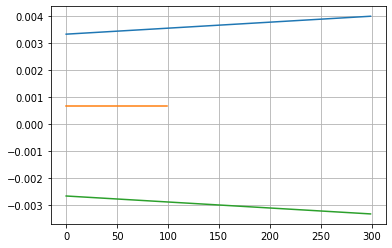

In [11]:
plt.plot(t_rise, single_trap_rise)
plt.plot(t_flat,single_trap_flat)
plt.plot(t_dec,single_trap_dec)
plt.grid()

In [12]:
c_z_flat = np.polyfit(t_flat,single_trap_flat,2)
c_z_rise = np.polyfit(t_rise,single_trap_rise,2)
c_z_dec = np.polyfit(t_dec,single_trap_dec,2)
print(c_z_rise)
print(c_z_flat)
print(c_z_dec)

[1.80099851e-23 2.22222222e-06 3.33333333e-03]
[ 2.47364325e-22 -2.11914067e-20  6.66666667e-04]
[-1.48149148e-23 -2.22222222e-06 -2.66666667e-03]


In [13]:
#check for the fit coefficient
#f=[0]*300
#for i in range(0, 300):
#    j=i+400
#    f[i]=c_z_dec[2]+c_z_dec[1]*j+c_z_dec[0]*j**2

In [14]:
#plt.plot(f)
#plt.plot(t_dec,single_trap_dec)

In [15]:
c_matrix=[[1,0,0],[0,1,0.5],[0,0,0.5]]

In [16]:
c_inv=np.linalg.inv(c_matrix)
c_inv

array([[ 1.,  0.,  0.],
       [ 0.,  1., -1.],
       [ 0.,  0.,  2.]])

In [17]:
c_rise_correct=[c_z_rise[2],c_z_rise[1], c_z_rise[0]]
c_flat_correct=[c_z_flat[2],c_z_flat[1], c_z_flat[0]]
c_dec_correct=[c_z_dec[2],c_z_dec[1], c_z_dec[0]]

In [18]:
cp_rise=np.matmul(c_inv,c_rise_correct)
cp_flat=np.matmul(c_inv,c_flat_correct)
cp_dec=np.matmul(c_inv,c_dec_correct)
print(cp_rise)
print(cp_flat)
print(cp_dec)

[3.33333333e-03 2.22222222e-06 3.60199702e-23]
[ 6.66666667e-04 -2.14387710e-20  4.94728649e-22]
[-2.66666667e-03 -2.22222222e-06 -2.96298297e-23]


In [19]:
def DT_Filter(risetime, flat_top, tau):
    f1=np.zeros(4*risetime+2*flat_top)
    for i in range(risetime):
        f1[i]=-i-tau
    for i in range(risetime,risetime+flat_top):
        f1[i]=-risetime
        #f1[i+risetime+flat_top]=-i-tau+risetime
    for i in range(risetime+flat_top,3*risetime+flat_top):
        f1[i]=i+tau-2*risetime-flat_top
    for i in range(3*risetime+flat_top,3*risetime+2*flat_top):
        f1[i]=risetime
    for i in range(3*risetime+2*flat_top,4*risetime+2*flat_top):
        f1[i]=-i-tau+4*risetime+2*flat_top
        
    scale=1.0/(risetime*tau)
    f1*=scale
    return f1

In [20]:
A=DT_Filter(300,100,1500)

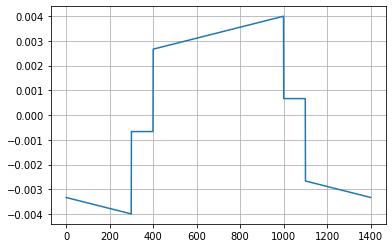

In [21]:
plt.plot(A)
plt.grid()

In [22]:
Double_trap_dec1=A[:300]
t_dec1=np.arange(0,300)
Double_trap_flat1=A[300:400]
t_flat1=np.arange(0,100)
Double_trap_rise=A[400:1000]
t_rise=np.arange(0,600)
Double_trap_flat2=A[1000:1100]
t_flat2=np.arange(0,100)
Double_trap_dec2=A[1100:1400]
t_dec2=np.arange(0,300)

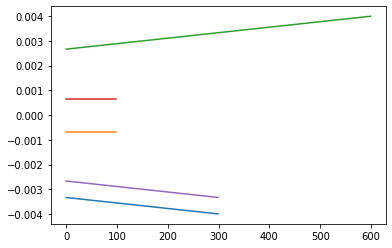

In [23]:
plt.plot(Double_trap_dec1)
plt.plot(Double_trap_flat1)
plt.plot(Double_trap_rise)
plt.plot(Double_trap_flat2)
plt.plot(Double_trap_dec2)


In [24]:
cDT_z_dec1 = np.polyfit(t_dec1,Double_trap_dec1,2)
cDT_z_flat1 = np.polyfit(t_flat1,Double_trap_flat1,2)
cDT_z_rise = np.polyfit(t_rise,Double_trap_rise,2)
cDT_z_flat2 = np.polyfit(t_flat2,Double_trap_flat2,2)
cDT_z_dec2 = np.polyfit(t_dec2,Double_trap_dec2,2)

print(cDT_z_dec1)
print(cDT_z_flat1)
print(cDT_z_rise)
print(cDT_z_flat2)
print(cDT_z_dec2)

[-1.80099851e-23 -2.22222222e-06 -3.33333333e-03]
[-2.47364325e-22  2.11914067e-20 -6.66666667e-04]
[2.06912543e-23 2.22222222e-06 2.66666667e-03]
[ 2.47364325e-22 -2.11914067e-20  6.66666667e-04]
[-1.48149148e-23 -2.22222222e-06 -2.66666667e-03]


In [25]:
#now arranging as first element is order 0 element 
cDT_z_dec1=[cDT_z_dec1[2],cDT_z_dec1[1],cDT_z_dec1[0]]
cDT_z_flat1=[cDT_z_flat1[2],cDT_z_flat1[1],cDT_z_flat1[0]]
cDT_z_rise=[cDT_z_rise[2],cDT_z_rise[1],cDT_z_rise[0]]
cDT_z_flat2=[cDT_z_flat2[2],cDT_z_flat2[1],cDT_z_flat2[0]]
cDT_z_dec2=[cDT_z_dec2[2],cDT_z_dec2[1],cDT_z_dec2[0]]

In [26]:
cDT_z_dec1

[-0.003333333333333335, -2.2222222222222094e-06, -1.8009985094078437e-23]

In [27]:
cp_dec1=np.matmul(c_inv,cDT_z_dec1)
cp_flat1=np.matmul(c_inv,cDT_z_flat1)
cp_rise=np.matmul(c_inv,cDT_z_rise)
cp_flat2=np.matmul(c_inv,cDT_z_flat2)
cp_dec2=np.matmul(c_inv,cDT_z_dec2)
print(cp_dec1)
print(cp_flat1)
print(cp_rise)
print(cp_flat2)
print(cp_dec2)

[-3.33333333e-03 -2.22222222e-06 -3.60199702e-23]
[-6.66666667e-04  2.14387710e-20 -4.94728649e-22]
[2.66666667e-03 2.22222222e-06 4.13825086e-23]
[ 6.66666667e-04 -2.14387710e-20  4.94728649e-22]
[-2.66666667e-03 -2.22222222e-06 -2.96298297e-23]
